[[216 100]
 [ 82 237]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       316
           1       0.70      0.74      0.72       319

    accuracy                           0.71       635
   macro avg       0.71      0.71      0.71       635
weighted avg       0.71      0.71      0.71       635


Count of Selected and Rejected Resumes:
decision
rejected    1609
selected    1565
Name: count, dtype: int64


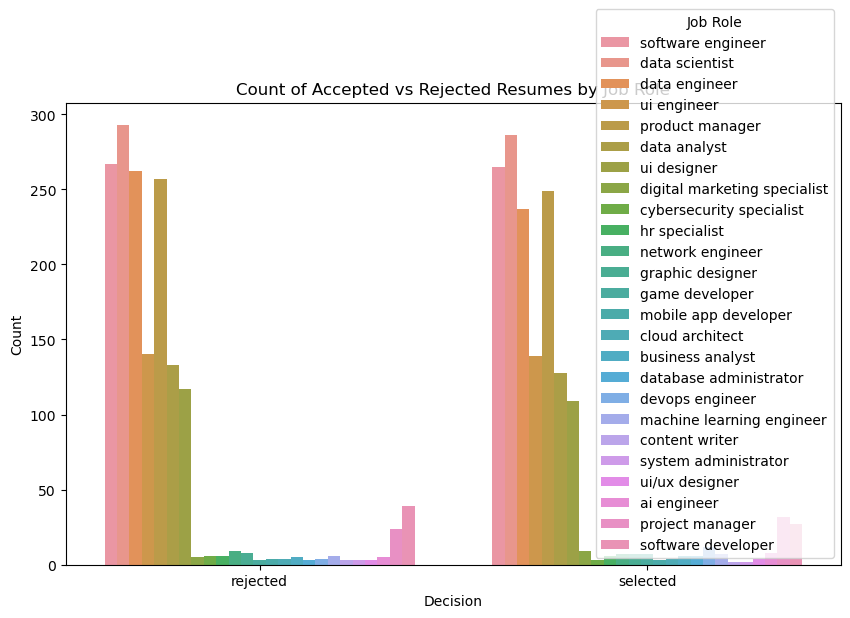

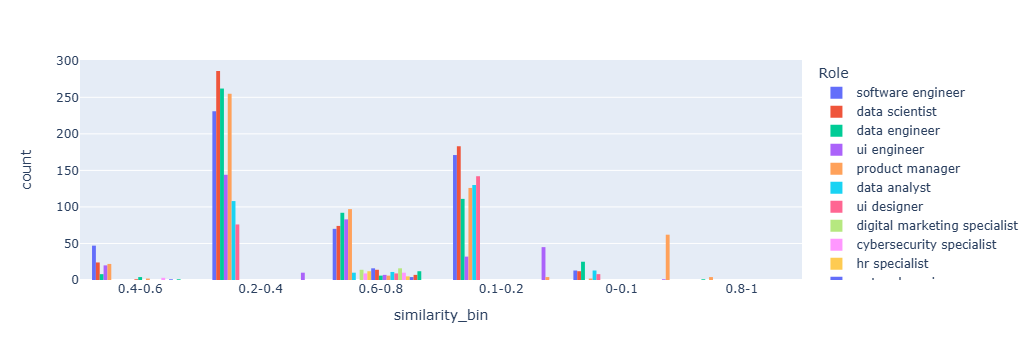


Grouped Result by Similarity Bin, Decision, and Role:
Role                     ai engineer  business analyst  cloud architect  \
similarity_bin decision                                                   
0-0.1          rejected            0                 0                0   
               selected            0                 0                0   
0.1-0.2        rejected            0                 0                0   
               selected            0                 0                0   
0.2-0.4        rejected            0                 0                0   
               selected            0                 0                0   
0.4-0.6        rejected            0                 0                1   
               selected            1                 0                1   
0.6-0.8        rejected            5                 5                3   
               selected            7                 6                3   
0.8-1          rejected            0         

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
combined_df = pd.read_excel('dataset12.xlsx')

# Define bins and labels for resume_jobdesc_similarity
bins = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0-0.1', '0.1-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

# Create a new column with binned values for resume_jobdesc_similarity
combined_df['similarity_bin'] = pd.cut(combined_df['resume_jobdesc_similarity'], bins=bins, labels=labels, include_lowest=True)

# Define keywords for each job role
role_keywords = {
    'software engineer': ['Java', 'C++', 'Python', 'Software Development', 'Agile', 'Git'],
    'data scientist': ['Python', 'Machine Learning', 'Data Analysis', 'Statistics', 'R', 'SQL'],
    'data engineer': ['ETL', 'Data Warehousing', 'SQL', 'Python', 'Big Data', 'Spark'],
    'ui engineer': ['HTML', 'CSS', 'JavaScript', 'UI Development', 'Responsive Design'],
    'product manager': ['Product Development', 'Market Research', 'Stakeholder Management', 'Agile'],
    'data analyst': ['Excel', 'SQL', 'Data Visualization', 'Reporting', 'Tableau', 'Power BI'],
    'ui designer': ['Adobe XD', 'Sketch', 'Figma', 'UI Design', 'Prototyping'],
    'digital marketing specialist': ['SEO', 'PPC', 'Content Marketing', 'Social Media'],
    'cybersecurity specialist': ['Network Security', 'Firewalls', 'Penetration Testing', 'Risk Assessment'],
    'hr specialist': ['Recruitment', 'Employee Relations', 'Performance Management', 'HR Policies'],
    'network engineer': ['Networking', 'TCP/IP', 'Routing', 'Switching', 'Network Security'],
    'graphic designer': ['Adobe Photoshop', 'Illustrator', 'Graphic Design', 'Branding'],
    'game developer': ['Unity', 'C#', 'Game Design', '3D Modeling', 'Game Development'],
    'mobile app developer': ['iOS', 'Android', 'React Native', 'Flutter', 'Mobile Development'],
    'cloud architect': ['AWS', 'Azure', 'Cloud Computing', 'Infrastructure', 'DevOps'],
    'business analyst': ['Business Requirements', 'Stakeholder Engagement', 'Data Analysis'],
    'database administrator': ['SQL', 'Database Management', 'Oracle', 'MySQL', 'Performance Tuning'],
    'devops engineer': ['CI/CD', 'Docker', 'Kubernetes', 'Automation', 'Infrastructure as Code'],
    'machine learning engineer': ['TensorFlow', 'Keras', 'Deep Learning', 'Model Deployment'],
    'content writer': ['Content Creation', 'SEO', 'Blogging', 'Copywriting'],
    'system administrator': ['Linux', 'Windows Server', 'Networking', 'System Maintenance'],
    'ui/ux designer': ['User Research', 'Wireframing', 'Prototyping', 'Usability Testing'],
    'ai engineer': ['Artificial Intelligence', 'Machine Learning', 'Deep Learning', 'NLP'],
    'project manager': ['Project Planning', 'Risk Management', 'Agile', 'Scrum'],
    'software developer': ['Java', 'C#', 'Python', 'Software Development', 'Version Control'],
}

# Keyword Matching based on Role
def match_keywords(row):
    keywords = role_keywords.get(row['Role'], [])
    return any(keyword in row['Resume'] for keyword in keywords)

combined_df['keyword_match'] = combined_df.apply(match_keywords, axis=1)

# Advanced Feature Engineering
combined_df['keyword_count'] = combined_df.apply(
    lambda row: sum(row['Resume'].count(keyword) for keyword in role_keywords.get(row['Role'], [])), axis=1)

# Machine Learning Model
# Vectorize the resumes
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(combined_df['Resume'])
y = combined_df['decision'].map({'selected': 1, 'rejected': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Count of Selected and Rejected Resumes
decision_counts = combined_df['decision'].value_counts()

# Display the counts of selected and rejected resumes
print("\nCount of Selected and Rejected Resumes:")
print(decision_counts)

# Visualization of decisions by job role
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='decision', hue='Role')
plt.title('Count of Accepted vs Rejected Resumes by Job Role')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.legend(title='Job Role')
plt.show()

# Enhanced Visualization
fig = px.histogram(combined_df, x='similarity_bin', color='Role', barmode='group')
fig.show()

# Display the grouped result by similarity bin, decision, and role
# Group by similarity_bin, decision, and Role, then count occurrences
result = combined_df.groupby(['similarity_bin', 'decision', 'Role'], observed=False).size().unstack(fill_value=0)
print("\nGrouped Result by Similarity Bin, Decision, and Role:")
print(result)


In [12]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
combined_df = pd.read_excel('dataset12.xlsx')

# Define bins and labels for resume_jobdesc_similarity
bins = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0-0.1', '0.1-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

# Create a new column with binned values for resume_jobdesc_similarity
combined_df['similarity_bin'] = pd.cut(combined_df['resume_jobdesc_similarity'], bins=bins, labels=labels, include_lowest=True)

# Group by similarity_bin, decision, and Role, then count occurrences
result = combined_df.groupby(['similarity_bin', 'decision', 'Role']).size().unstack(fill_value=0)

# Display the result
print("Grouped Result by Similarity Bin, Decision, and Role:")
print(result)

# Count the number of selected and rejected resumes
decision_counts = combined_df['decision'].value_counts()

# Display the counts of selected and rejected resumes
print("\nCount of Selected and Rejected Resumes:")
print(decision_counts)

Grouped Result by Similarity Bin, Decision, and Role:
Role                     ai engineer  business analyst  cloud architect  \
similarity_bin decision                                                   
0-0.1          rejected            0                 0                0   
               selected            0                 0                0   
0.1-0.2        rejected            0                 0                0   
               selected            0                 0                0   
0.2-0.4        rejected            0                 0                0   
               selected            0                 0                0   
0.4-0.6        rejected            0                 0                1   
               selected            1                 0                1   
0.6-0.8        rejected            5                 5                3   
               selected            7                 6                3   
0.8-1          rejected            0          

C:\Users\Rishy\AppData\Local\Temp\ipykernel_18060\1587036923.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = combined_df.groupby(['similarity_bin', 'decision', 'Role']).size().unstack(fill_value=0)
